<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://------">Anna Monreale</a><br/>
<b>Python version:</b>  3.x<br/>
<b>Last update:</b> 05/01/2020
</span>

<img align="right" width="250" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Cluster-2.svg/601px-Cluster-2.svg.png">

# Clustering with Python

This notebook contains an overview of basic python functionalities for clustering using the [sklearn](http://scikit-learn.org/stable/) library.  
Note: this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

Import of the basic packages to use

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Tips Dataset  
This notebook contains a clustering analysis of the well-known **"tips dataset"** describing tips given in a restaurant on top of the bill. 

It is a common custom to offer some small extra money - a tip - to the staff of a restaurant on top of the bill after a satisfactory service received. Although the tips are voluntary, and the amount of the tips is not (usually) stated, by convention it is often advised to leave as a certain percent (e.g. 10%) of the total bill for the meal and service.

The tips dataset (being analysed in this Notebook) is a representation of tips given in a restaurant. The dataset in question is a record (allegedly real and true) of tips given along with total bills of a restaurant customers collated by a waiter working in the restaurant for several weeks.

The data is organised in a form of an array, where the dataset attributes (aka features) are organised in columns, and the observations (aka instances) - in rows. The dataset consists of several data categories describing tips received in connection to circumstances, such as day of the week, gender of the tipper, etc. The data set includes 244 data observations.

This dataset is made available at the following link: https://github.com/mwaskom/seaborn-data where you can find other interesting datasets.


In [2]:
df = pd.read_csv("./datasets/tips.csv", skipinitialspace=True, sep=',')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Since we use distance metric working on numerical features we remove the categorical data. 

In [4]:
cat_feature = df[['sex','smoker','day', 'time']]
del df['time']
del df['sex']
del df['smoker']
del df ['day']
df.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [5]:
 #new column created - percent of tip
df["tip_ratio"] = df["tip"]/df["total_bill"] 

# new column created - sum of total bill and tip
df["sum"] = df["total_bill"]+df["tip"] # appended at the end of the array

# new column created - ratio of tip to sum
df["percent"] = round(df["tip"]/df["sum"]*100, 2)

# add column: bpp - bill per person
df["bpp"] = df["total_bill"]/df["size"]

# add column: tpp - tip per person
df["tpp"] = df["tip"]/df["size"]
df.head()

,total_bill,tip,size,tip_ratio,sum,percent,bpp,tpp
0,16.99,1.01,2,0.059447,18.00,5.61,8.495000,0.505000
1,10.34,1.66,3,0.160542,12.00,13.83,3.446667,0.553333
2,21.01,3.50,3,0.166587,24.51,14.28,7.003333,1.166667
3,23.68,3.31,2,0.139780,26.99,12.26,11.840000,1.655000
4,24.59,3.61,4,0.146808,28.20,12.80,6.147500,0.902500


## Clustering Objective
Grouping a set of instances such that the instances in the same cluster are more ***similar*** (in some sense) to each other than to those in other clusters.  
The result of a clustering algorithm is a ***clustering***, that is a set of clusters.
Clustering is an ***unsupervised*** task, i.e., the real cluster partitioning is unknown.  

## Different Types of Clusterings and Clusters

Principal Types of Clustering:
* **Partitional Clustering:** division into non-overlapping clusters, i.e., each instance is only in one cluster
* Hierarchical Clustering: set of nested clusters organized as a hierarchical tree

Principal Types of Clusters:
* **Center-based:** the calculus is based on a centroid (K-Means)
* **Density-based:** the calculus is based on a concept of neighborhood and density (DBSCAN)

Center-based: <img align="center" src="kmeans.png">
Density-based: <img align="center" src="dbscan.png">

## Clustering Preprocessing - Normalization  
A good practice in clustering to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df.values)

StandardScaler()

In [8]:
df.head().values

array([[16.99      ,  1.01      ,  2.        ,  0.05944673, 18.        ,
         5.61      ,  8.495     ,  0.505     ],
       [10.34      ,  1.66      ,  3.        ,  0.16054159, 12.        ,
        13.83      ,  3.44666667,  0.55333333],
       [21.01      ,  3.5       ,  3.        ,  0.16658734, 24.51      ,
        14.28      ,  7.00333333,  1.16666667],
       [23.68      ,  3.31      ,  2.        ,  0.13978041, 26.99      ,
        12.26      , 11.84      ,  1.655     ],
       [24.59      ,  3.61      ,  4.        ,  0.14680765, 28.2       ,
        12.8       ,  6.1475    ,  0.9025    ]])

In [9]:
scaler.transform(df.head().values)

array([[-0.31471131, -1.43994695, -0.60019263, -1.66301817, -0.48473195,
        -1.98342863,  0.20862895, -1.44236191],
       [-1.06323531, -0.96920534,  0.45338292, -0.00428234, -1.09264524,
         0.04609142, -1.52716489, -1.34386242],
       [ 0.1377799 ,  0.36335554,  0.45338292,  0.09491467,  0.17485397,
         0.15719653, -0.3042583 , -0.09393783],
       [ 0.4383151 ,  0.22575414, -0.60019263, -0.34492594,  0.42612479,
        -0.34154197,  1.35875712,  0.90124668],
       [ 0.5407447 ,  0.4430195 ,  1.50695847, -0.22962497,  0.54872064,
        -0.20821584, -0.59852378, -0.6322885 ]])

In [10]:
scaler.inverse_transform(scaler.transform(df.head().values))

array([[16.99      ,  1.01      ,  2.        ,  0.05944673, 18.        ,
         5.61      ,  8.495     ,  0.505     ],
       [10.34      ,  1.66      ,  3.        ,  0.16054159, 12.        ,
        13.83      ,  3.44666667,  0.55333333],
       [21.01      ,  3.5       ,  3.        ,  0.16658734, 24.51      ,
        14.28      ,  7.00333333,  1.16666667],
       [23.68      ,  3.31      ,  2.        ,  0.13978041, 26.99      ,
        12.26      , 11.84      ,  1.655     ],
       [24.59      ,  3.61      ,  4.        ,  0.14680765, 28.2       ,
        12.8       ,  6.1475    ,  0.9025    ]])

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)

In [12]:
X[:5]

array([[0.29157939, 0.00111111, 0.2       , 0.03528733, 0.24550582,
        0.05697033, 0.32298851, 0.03579545],
       [0.1522832 , 0.07333333, 0.4       , 0.18512259, 0.13976031,
        0.27277501, 0.03285441, 0.05227273],
       [0.3757855 , 0.27777778, 0.4       , 0.19408316, 0.36023969,
        0.28458913, 0.23726054, 0.26136364],
       [0.43171345, 0.25666667, 0.2       , 0.15435191, 0.40394783,
        0.23155684, 0.51522989, 0.42784091],
       [0.45077503, 0.29      , 0.6       , 0.16476717, 0.42527318,
        0.24573379, 0.18807471, 0.17130682]])

# K-Means

## The Algorithm in a Nutshell

**Objective:** Clusters the data into $k$ groups.
* **Init step:** Select k points at random as cluster centers.
* **Assignment step:** Assign each instance to the cluster with the closest mean according to the distance function.
* **Update step**: Calculate the new means to be the centroids of the instances in the new clusters.
* ***Repeat*** steps 2 and 3 until the assignment no longer change.

There is no guarantee that the optimum is found using this algorithm.

> Tan, P. N. (2006). Introduction to data mining. Pearson Education India.

Running [example](http://matlaspisa.isti.cnr.it:5055/K-Means)
Wikipedia [link](https://en.wikipedia.org/wiki/K-means_clustering)

## K-Means Problems

* Initial Centroids
* Number of clusters

## K-Means in Python  ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#k-means))

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Parameters:
* **n_clusters** (default 8): The number of clusters
* **n_init** (default 10): Number of time k-means will be run with different initial centroids. The final results will be the best output in terms of inertia.
* **max_iter** (default 300): Maximum number of iterations of the k-means algorithm for a single run.

In [14]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=100)
kmeans.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=10)

Output:
* **labels_**: Labels of each point
* **cluster\_centers_**: Coordinates of cluster centers
* **inertia_**: Sum of squared distances of samples to their closest cluster center.

Labels

In [17]:
kmeans.labels_[:5]

array([0, 0, 0, 1, 2])

Observing the size of each cluster

In [18]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([133,  64,  47], dtype=int64))

In [19]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 133, 1: 64, 2: 47}

Visualization of the clustering in two dimensions.

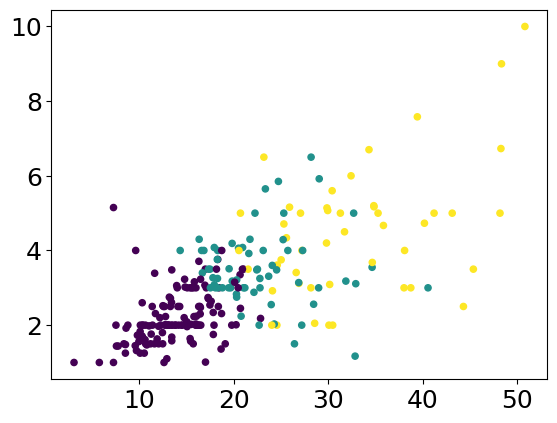

In [20]:
plt.scatter(df['total_bill'], df['tip'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

Centers

In [21]:
kmeans.cluster_centers_

array([[0.22590095, 0.1366249 , 0.25263158, 0.19560462, 0.21174014,
        0.28041816, 0.19416789, 0.2100927 ],
       [0.41230166, 0.27935764, 0.21875   , 0.18668   , 0.39121431,
        0.27040398, 0.46546336, 0.43823686],
       [0.61709258, 0.38565012, 0.61702128, 0.15534817, 0.58038158,
        0.22893148, 0.31247819, 0.24718085]])

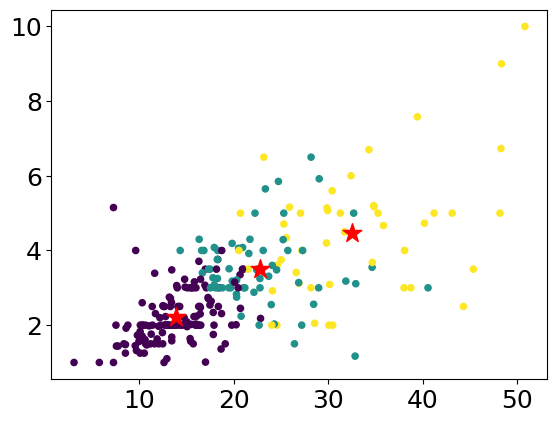

array([[13.85451128,  2.22962406,  2.26315789,  0.16761388, 16.08413534,
        14.12112782,  6.2535213 ,  1.01627193],
       [22.75328125,  3.51421875,  2.09375   ,  0.16159238, 26.2675    ,
        13.7396875 , 10.9740625 ,  1.68549479],
       [32.53      ,  4.47085106,  4.08510638,  0.14045259, 37.00085106,
        12.16      ,  8.31212057,  1.12506383]])

In [22]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(df['total_bill'], df['tip'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

Visualization of clusters centers by means of parallel coordinates

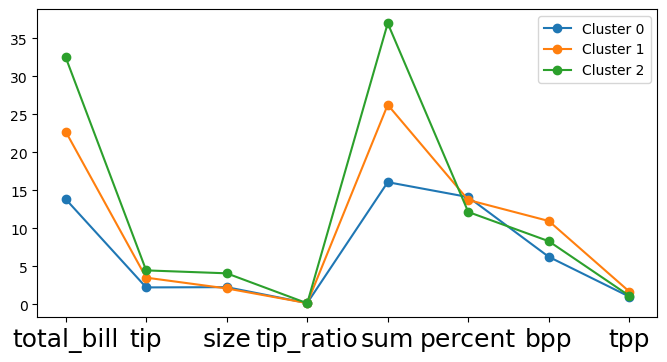

In [23]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(df.columns)), df.columns, fontsize=18)
plt.legend(fontsize=10)
plt.show()

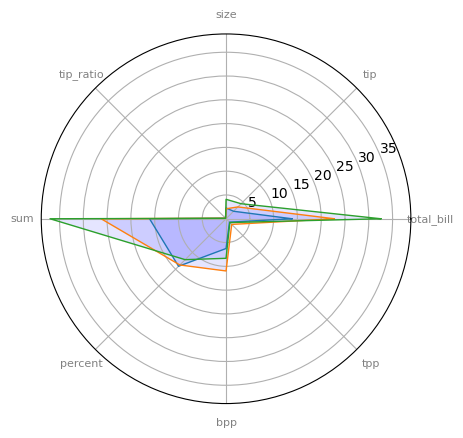

In [24]:
from math import pi
 
# number of variable
N = len(df.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
# Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], df.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

SSE and Clustering Validation

In [25]:
from sklearn import metrics

print('SSE %s' % kmeans.inertia_) # cohesion, lower value better clustering (error minimization)
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_)) # lower value, better clustering (minimum zero)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
# Silhouette. The best value is 1 and the worst value is -1. 
# Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster

SSE 24.567151197554796
Separation 1.135996817572877
Silhouette 0.3388241175099862


In [26]:
df_c = df.join(cat_feature) #add categorical features
df_c.head()

,total_bill,tip,size,tip_ratio,sum,percent,bpp,tpp,sex,smoker,day,time
0,16.99,1.01,2,0.059447,18.00,5.61,8.495000,0.505000,Female,No,Sun,Dinner
1,10.34,1.66,3,0.160542,12.00,13.83,3.446667,0.553333,Male,No,Sun,Dinner
2,21.01,3.50,3,0.166587,24.51,14.28,7.003333,1.166667,Male,No,Sun,Dinner
3,23.68,3.31,2,0.139780,26.99,12.26,11.840000,1.655000,Male,No,Sun,Dinner
4,24.59,3.61,4,0.146808,28.20,12.80,6.147500,0.902500,Female,No,Sun,Dinner


In [27]:
sex_xt_pct = pd.crosstab(kmeans.labels_,df_c['sex'])


In [28]:
sex_xt_pct

sex,Female,Male
row_0,,
0,53,80
1,21,43
2,13,34


In [29]:
smoker_xt_pct = pd.crosstab( kmeans.labels_,df_c['smoker'])


In [30]:
smoker_xt_pct

smoker,No,Yes
row_0,,
0,88,45
1,33,31
2,30,17


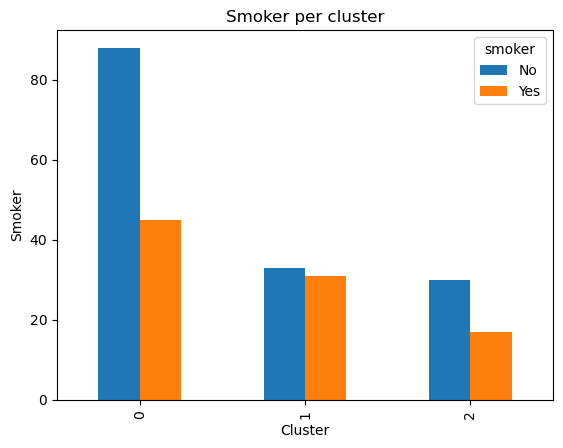

In [31]:
smoker_xt_pct.plot(kind='bar', stacked=False, 
                   title='Smoker per cluster')
plt.xlabel('Cluster')
plt.ylabel('Smoker')
plt.show()

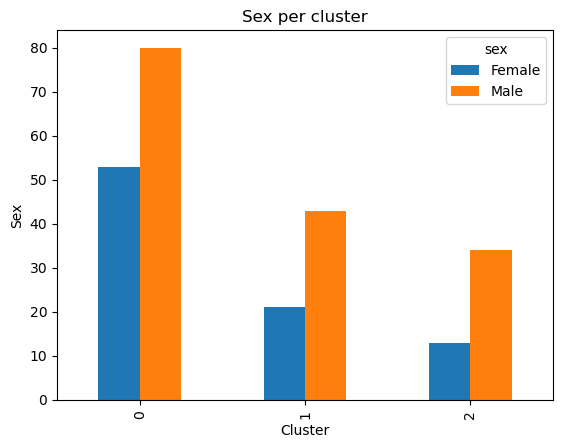

In [32]:
sex_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sex per cluster')
plt.xlabel('Cluster')
plt.ylabel('Sex')
plt.show()

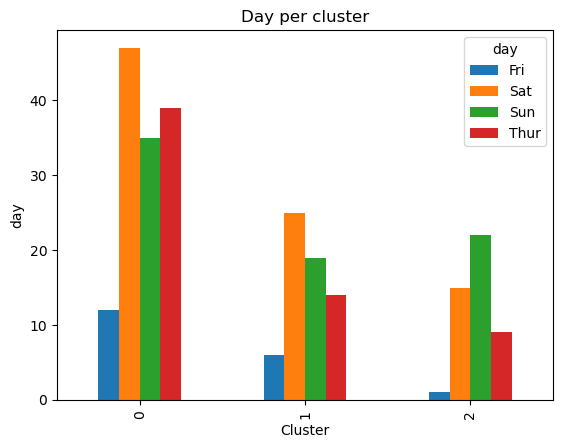

In [33]:
time_xt_pct = pd.crosstab( kmeans.labels_,df_c['day'])

time_xt_pct.plot(kind='bar', stacked=False, 
                   title='Day per cluster')
plt.xlabel('Cluster')
plt.ylabel('day')
plt.show()

Knee Method to estimate the best K

In [34]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

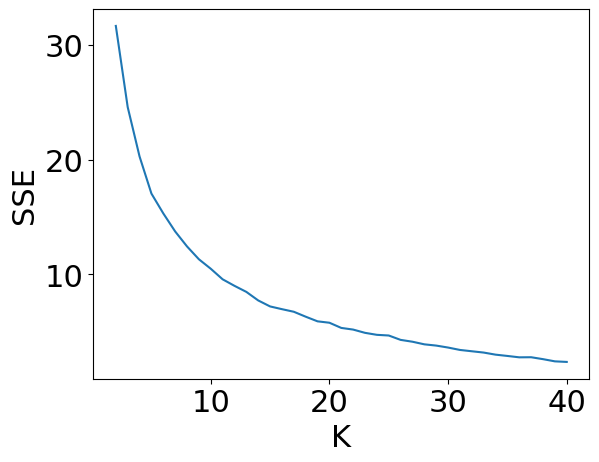

In [35]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

# DBSCAN

## The Algorithm in a Nutshell

* A point is a **core** if it has more than minPts points within eps
* A point is a **border** if it has less than minPts points within eps but one of its neighboors is a core point
* A **noise** point is neither a core or a border point


1. Label all points as core, border or noise points
1. Eliminate noise points.
1. Put an edge between all core points that are within eps of each other
1. Make each group of connected core points into a separate cluster.
1. Assign each border point to one of the clusters of its associated core points.

> Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, No. 34, pp. 226-231).

Running [example](http://matlaspisa.isti.cnr.it:5055/Dbscan)  
Wikipedia [link](https://en.wikipedia.org/wiki/DBSCAN)

## DBSCAN Problems

* Parameter tuning
* Does not recognize different densities

## DBSCAN in Python ([sklearn](http://scikit-learn.org/stable/modules/clustering.html#dbscan))

In [36]:
from sklearn.cluster import DBSCAN

Parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself.

In [37]:
dbscan = DBSCAN(eps=0.15, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=3)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

Labels

In [38]:
dbscan.labels_[:5]

array([ 0, -1,  1,  0,  2], dtype=int64)

Observing the size of each cluster

In [39]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([ 43, 145,  24,  28,   4], dtype=int64))

Visualization of the clustering in two dimensions.

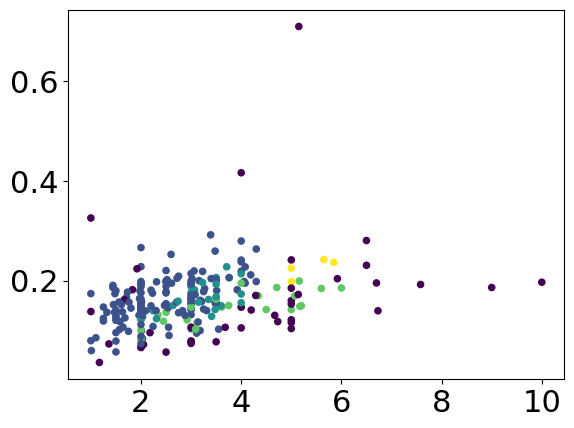

In [40]:
plt.scatter(df['tip'], df['tip_ratio'], c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Clustering Validation

In [41]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.07217613139535121


Knee Method to estimate the best eps

In [42]:
from scipy.spatial.distance import pdist, squareform

In [44]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.47882476 0.52158959 0.58767617 ... 0.20274274 0.31055905 0.30293466]

[[0.         0.47882476 0.52158959 ... 0.31830516 0.18775098 0.49033848]
 [0.47882476 0.         0.47548155 ... 0.64865302 0.4669884  0.58648114]
 [0.52158959 0.47548155 0.         ... 0.41704501 0.37639682 0.28212209]
 ...
 [0.31830516 0.64865302 0.41704501 ... 0.         0.20274274 0.31055905]
 [0.18775098 0.4669884  0.37639682 ... 0.20274274 0.         0.30293466]
 [0.49033848 0.58648114 0.28212209 ... 0.31055905 0.30293466 0.        ]]


In [45]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

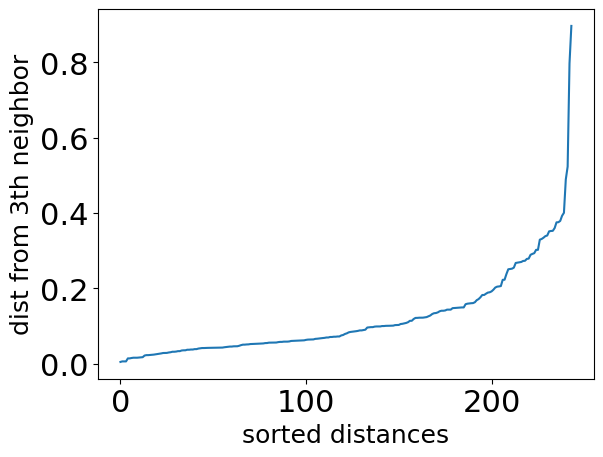

In [46]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering 

#### There are 2 kinds of hierarchical clustering: agglomerative and divisive. In the following, there are some example of the agglomerative clustering using scipy. The scipy library allows for hierachical clusters by exploiting the linkage function and then the dendrogram. The first function, given a matrix of pair-wise distances, computes the agglomerative clustering. There are 2 parameters: the method, that can be single, complete, ward, average, weighted, centroids and median, and the metric used to compute the distances, such as euclidean or cosine. Then, with the dendrogram function, it is possible to visualize the result obtained. This kind of clustering is also possible with scikit-learn library, but the dendrogram visualization is not directly available.

In [48]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

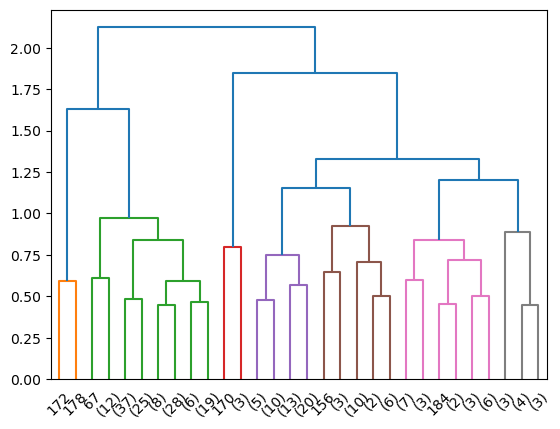

In [49]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

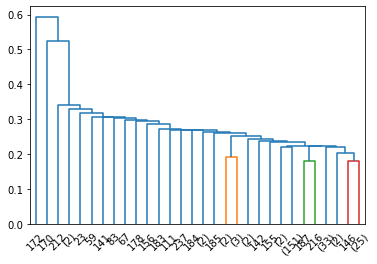

In [65]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

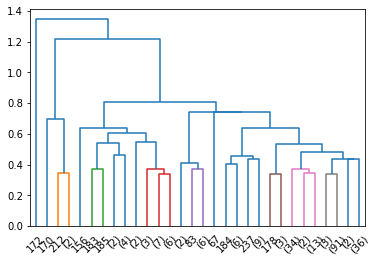

In [66]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

In [71]:
#with sciki-learn you have to select the number of clusters you want
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)


array([3, 3, 0, 1, 0, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1, 1, 3, 0, 0, 0, 1, 1,
       3, 2, 1, 0, 3, 3, 1, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 3,
       0, 1, 2, 0, 0, 1, 1, 3, 0, 3, 0, 1, 0, 2, 3, 2, 1, 3, 3, 0, 0, 0,
       3, 3, 3, 3, 3, 0, 2, 2, 3, 3, 1, 0, 1, 3, 1, 1, 1, 2, 3, 0, 3, 1,
       2, 1, 2, 1, 3, 1, 1, 0, 2, 3, 1, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       1, 3, 0, 2, 0, 1, 0, 3, 3, 0, 1, 3, 1, 3, 1, 0, 3, 3, 3, 0, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 0, 0, 0, 3, 3, 0, 3, 3, 3, 1, 3, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 1, 0, 3, 0, 3, 3, 2, 1, 1, 2, 1, 2,
       3, 3, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 3, 1, 2, 3, 1, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 2, 3, 0, 3, 3, 0,
       1, 1, 1, 0, 3, 3, 3, 0, 1, 1, 0, 0, 1, 3, 1, 3, 3, 2, 0, 2, 2, 2,
       3, 1])

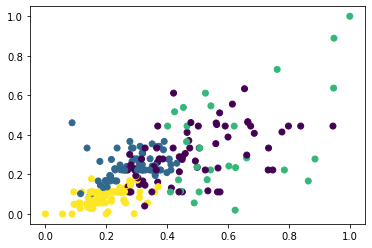

In [72]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_)